## Loading Libraries

In [12]:
import pandas as pd
import seaborn as sns
from elo import rate_1vs1
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Loading Match Data

In [13]:
matches=pd.read_csv('MatchData.csv',low_memory=False)  ## IDk what low memory does but it works



### Getting List of all teams

In [14]:

## List of all teams
teamset=set()
for team in matches['HomeTeam']:
    teamset.add(team)
for team in matches['AwayTeam']:
    teamset.add(team)
print(teamset)

{nan, 'Girona', 'Valladolid', 'Extremadura', 'Villarreal', 'Las Palmas', 'Sp Gijon', 'Oviedo', 'Sevilla', 'Huesca', 'Espanol', 'Mallorca', 'Almeria', 'Levante', 'Lerida', 'Cadiz', 'Xerez', 'Eibar', 'Alaves', 'Getafe', 'Santander', 'Ath Madrid', 'Celta', 'Tenerife', 'Betis', 'Merida', 'Vallecano', 'Hercules', 'Cordoba', 'Murcia', 'Barcelona', 'Albacete', 'Osasuna', 'Granada', 'Ath Bilbao', 'Numancia', 'Sociedad', 'Logrones', 'Zaragoza', 'Recreativo', 'Villareal', 'La Coruna', 'Elche', 'Malaga', 'Valencia', 'Leganes', 'Salamanca', 'Compostela', 'Gimnastic', 'Real Madrid'}


TeamData of each and every team( We will add fields as we go on)

In [15]:
teamsdata={}
for team in teamset:
    teamdata={}
    teamdata['matches_played']=0
    teamdata['won']=0
    teamdata['tie']=0
    teamdata['elo']=1200  #Default rating
    teamsdata[team]=teamdata

In [16]:
matches

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,SP1,05/09/93,Ath Bilbao,Albacete,4.0,1.0,H,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SP1,05/09/93,Ath Madrid,Logrones,1.0,0.0,H,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SP1,05/09/93,Barcelona,Sociedad,3.0,0.0,H,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SP1,05/09/93,La Coruna,Celta,0.0,0.0,D,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SP1,05/09/93,Osasuna,Real Madrid,1.0,4.0,A,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11046,38,SP1,04/10/2020,Osasuna,Celta,2.0,0.0,H,2020,1.0,...,1.55,0.00,2.09,1.84,2.09,1.85,2.16,1.91,2.05,1.83
11047,39,SP1,04/10/2020,Alaves,Ath Bilbao,1.0,0.0,H,2020,0.0,...,1.40,0.25,1.93,2.00,1.95,1.97,1.97,2.01,1.92,1.94
11048,40,SP1,04/10/2020,Levante,Real Madrid,0.0,2.0,A,2020,0.0,...,2.51,1.00,2.07,1.86,2.06,1.87,2.16,1.90,2.03,1.83
11049,41,SP1,04/10/2020,Cadiz,Granada,1.0,1.0,D,2020,0.0,...,1.38,0.25,1.68,2.15,1.70,2.29,1.80,2.30,1.71,2.21


In [17]:
for index, row in matches.iterrows(): 
    ht=row['HomeTeam']
    teamsdata[ht]['matches_played']+=1
    
    at=row["AwayTeam"]
#     print(ht ,at)
    teamsdata[at]['matches_played']+=1
    result=row['FTR']
#     print(result)
    if(result=='D'):
#         print("Tie")
        teamsdata[ht]['tie']+=1
        teamsdata[at]['tie']+=1
        wer=teamsdata[ht]['elo']
        ler=teamsdata[at]['elo']
        nwer , nler = rate_1vs1(wer,ler,drawn=True)
        teamsdata[ht]['elo']=nwer
        teamsdata[at]['elo']=nler
    else:
        
        winner=ht if result=='H' else at
        loser=at if result=='H' else ht
#         print("Winner",winner)
        teamsdata[winner]['won']+=1
        ## Updata elo ratings
        wer=teamsdata[winner]['elo']
        ler=teamsdata[loser]['elo']
        nwer , nler = rate_1vs1(wer,ler)
        teamsdata[winner]['elo']=nwer
        teamsdata[loser]['elo']=nler
        

teamsdata

{nan: {'matches_played': 1392, 'won': 696, 'tie': 0, 'elo': -2280.0},
 'Girona': {'matches_played': 76,
  'won': 23,
  'tie': 19,
  'elo': 1193.099738940263},
 'Valladolid': {'matches_played': 697,
  'won': 196,
  'tie': 210,
  'elo': 1185.0934224235232},
 'Extremadura': {'matches_played': 80,
  'won': 20,
  'tie': 23,
  'elo': 1172.42864622641},
 'Villarreal': {'matches_played': 715,
  'won': 301,
  'tie': 186,
  'elo': 1297.2655930954434},
 'Las Palmas': {'matches_played': 190,
  'won': 49,
  'tie': 44,
  'elo': 1122.8486276320145},
 'Sp Gijon': {'matches_played': 426,
  'won': 112,
  'tie': 96,
  'elo': 1149.185735587691},
 'Oviedo': {'matches_played': 312,
  'won': 91,
  'tie': 95,
  'elo': 1172.0821189047517},
 'Sevilla': {'matches_played': 912,
  'won': 389,
  'tie': 220,
  'elo': 1347.5700109795564},
 'Huesca': {'matches_played': 43,
  'won': 7,
  'tie': 16,
  'elo': 1185.7157005844808},
 'Espanol': {'matches_played': 985,
  'won': 327,
  'tie': 272,
  'elo': 1189.0179121004253}

In [18]:
teamstable=pd.DataFrame.from_dict(teamsdata,orient='Index')
teamstable['Team']=teamstable.index
teamstable.sort_values(by=['elo'],inplace=True,ascending=False)
topteams=teamstable.head(8)
topteams

,matches_played,won,tie,elo,Team
Barcelona,1026,657,207,1503.849174,Barcelona
Real Madrid,1028,646,196,1461.155086,Real Madrid
Ath Madrid,950,448,234,1415.888217,Ath Madrid
Sevilla,912,389,220,1347.570011,Sevilla
Villarreal,715,301,186,1297.265593,Villarreal
Valencia,1027,474,251,1292.151167,Valencia
Sociedad,912,331,247,1271.994148,Sociedad
Getafe,563,190,145,1266.046685,Getafe


In [19]:
sns.catplot(topteams, x="Team",y="elo")

TypeError: catplot() got multiple values for argument 'x'

In [20]:
players=pd.read_csv('player_scraper/playerdata.csv',low_memory=False)

In [21]:
players.head()

,name,goals_per90,assists_per90,goals_assists_pens_per90,goals_pens_per90,goals,shots_total_per90,shots_on_target_per90,shots_free_kicks,pens_made,...,dribbles_vs,pressures,pressure_regains,blocks,blocked_shots,dribbles_completed,carry_distance,fouls,aerials_won,ball_recoveries
0,Andriy Lunin,"['0.00', None, None]","['0.00', None, None]","['0.00', None, None]","['0.00', None, None]",NaN,NaN,NaN,NaN,NaN,...,"[None, '0', None]","[None, '0', None]","[None, '0', None]","[None, '1', None]","[None, '0', None]","[None, '0', None]","[None, '249', None]","0,0,1","[None, '0', None]","[None, '21', None]"
1,Víctor Chust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thibaut Courtois,"0.00,0.00,0.00","0.00,0.00,0.00","0.00,0.00,0.00","0.00,0.00,0.00","0,0,0","0.04,0.03,0.00","0.00,0.03,0.00","0,0,0","0,0,0",...,"3,2,0","3,1,1","0,0,0","0,0,0","0,0,0","1,0,0","2317,3238,564","0,0,0","0,1,0","118,161,13"
3,Diego Altube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alfonso Espino,"0.00,0.03,0.00","0.21,0.06,0.00","0.21,0.09,0.00","0.00,0.03,0.00","0,1,0","[None, '0.49', '0.40']","[None, '0.09', '0.00']","[None, None, '0']","0,0,0",...,"[None, None, '15']","[None, None, '87']","[None, None, '23']","[None, None, '15']","[None, None, '0']","[None, None, '3']","[None, None, '470']","[None, '58', '6']","[None, None, '3']","[None, None, '45']"


In [22]:
# We will compute three seasons average of all stats
def calcaverage(listt):
    if(pd.isna(listt)):
        return
    else:
        listt=listt.strip('][').split(',')
        cc=0
        val=0
        for x in listt:
            x=x.strip('\' ')
            
            if(x!="None"):
                cc+=1
                val=val+float(x)
        if(cc==0):
            return
        return (val/cc)
for c in players.columns:
    if(c=="name"):
        continue
    players[c]=players[c].apply(calcaverage)
    
#     players[c]=scipy.stats.norm.sf(abs(scipy.stats.zscore((players[c].to_numpy()),nan_policy='omit')))*200
    




In [23]:
currentcol=""
playerscores=pd.DataFrame()
def calcscore(x):
    return scipy.stats.percentileofscore(players[c].to_numpy(), x , kind='rank')
for c in players.columns:
    if(c=="name"):
        playerscores[c]=players[c]
        continue
    playerscores[c]=players[c].apply(calcscore)
#     players[c]=scipy.stats.norm.sf(abs(scipy.stats.zscore((players[c].to_numpy()),nan_policy='omit')))*200
    




In [24]:


temp=playerscores.sort_values(by="goals_assists_pens_per90",ascending=False)
temp.head()
# temp[temp['goals']>10]

,name,goals_per90,assists_per90,goals_assists_pens_per90,goals_pens_per90,goals,shots_total_per90,shots_on_target_per90,shots_free_kicks,pens_made,...,dribbles_vs,pressures,pressure_regains,blocks,blocked_shots,dribbles_completed,carry_distance,fouls,aerials_won,ball_recoveries
160,Antonio Cortés,91.187739,15.900383,91.187739,91.187739,58.716475,73.563218,79.693487,28.544061,33.141762,...,14.080460,25.478927,25.383142,18.869732,13.122605,38.218391,18.007663,45.114943,31.034483,15.134100
163,Roberto López,88.505747,90.996169,90.996169,88.697318,33.812261,51.915709,60.919540,65.038314,33.141762,...,10.919540,13.601533,14.176245,15.038314,13.122605,17.528736,8.045977,7.375479,25.670498,12.260536
274,Denis Cheryshev,55.842912,91.187739,90.804598,57.279693,42.911877,48.850575,50.191571,28.544061,33.141762,...,67.528736,71.647510,67.528736,66.858238,50.862069,63.122605,56.321839,72.126437,54.406130,48.084291
296,Luis Suárez,90.613027,89.463602,90.613027,90.613027,79.885057,79.310345,79.310345,73.754789,76.724138,...,37.068966,65.325670,63.984674,47.892720,46.647510,81.896552,64.559387,55.076628,32.758621,43.295019
275,Ansu Fati,90.804598,50.478927,90.421456,90.804598,72.796935,73.180077,77.969349,28.544061,33.141762,...,40.900383,49.042146,50.287356,43.582375,31.800766,70.785441,63.601533,37.835249,28.639847,28.065134


In [25]:

def givescorehelper(features,weightage):
    val=0
    cc=0
    for i in range(0, len(features)):
        if(pd.isna(features[i])):
            continue
        val+=features[i]*weightage[i]
        cc+=weightage[i]
    if(cc==0):
        return
    return val/cc


finalscores=pd.DataFrame()
finalscores['name']=players['name']
finalscores
maxscore=-1
def roundoff(x):
    if(pd.isna(x)):
        return
    global maxscore
    fact=100/maxscore
    return round(x*fact)
def  givescore(stylename , featurenames ,weightage):
    global maxscore
    maxscore=-1
    for i,row in playerscores.iterrows():
        name=row['name']
        features=[]
        for x in featurenames:
            features.append(playerscores.loc[i,x])
        
        score=givescorehelper(features,weightage)
        if(score==None):
            continue
        maxscore=max(maxscore,score)
        finalscores.loc[i,stylename]=score
    finalscores[stylename]=finalscores[stylename].apply(roundoff)
        
    
# this is where we give scores
givescore('striker',['goals_assists_pens_per90','shots_on_target_per90','goals'],[2,1,1])  
givescore('midfeilder',['carry_distance','passes_completed'],[1,1])

In [26]:
finalscores.sort_values(by="midfeilder",ascending=False)

,name,striker,midfeilder
284,Gerard Piqué,48.0,100.0
213,Daniel Parejo,69.0,99.0
143,Sergio Canales,87.0,99.0
422,Jesús Navas,61.0,99.0
440,Toni Kroos,67.0,99.0
...,...,...,...
480,César,NaN,NaN
481,Luis Castillo,NaN,NaN
482,Jonatan Carmona Alamo,13.0,NaN
499,Diego Bri,13.0,NaN


In [27]:
finalscores.sort_values(by="striker",ascending=False)

,name,striker,midfeilder
296,Luis Suárez,100.0,73.0
288,Lionel Messi,100.0,98.0
20,Roger Martí,98.0,46.0
424,Luuk de Jong,98.0,42.0
302,João Félix,97.0,56.0
...,...,...,...
476,Kevin Omoruyi,NaN,NaN
478,Ignacio Pastor,NaN,NaN
480,César,NaN,NaN
481,Luis Castillo,NaN,NaN


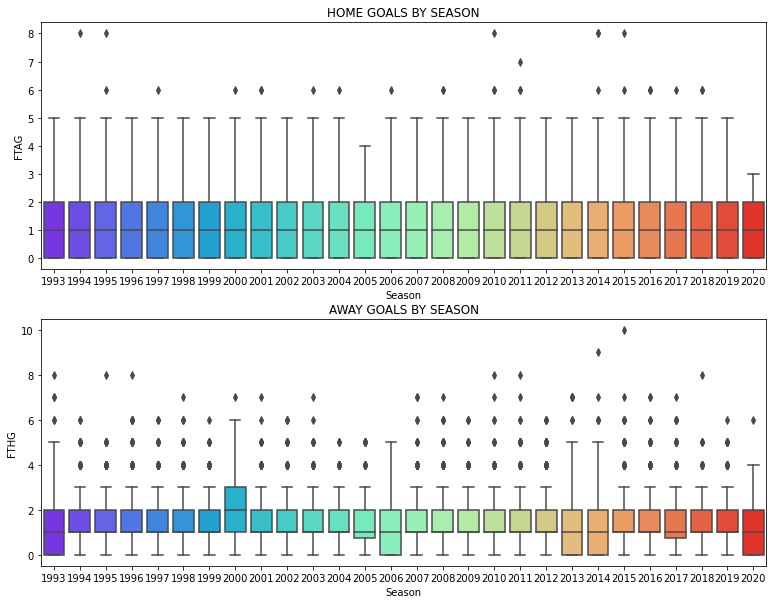

In [28]:
plt.figure(figsize=(13,10))
plt.subplot(211)
sns.boxplot(x = matches["Season"],y = matches["FTAG"],palette="rainbow")
plt.title("HOME GOALS BY SEASON")
plt.subplot(212)
sns.boxplot(x = matches["Season"],y = matches["FTHG"],palette="rainbow")
plt.title("AWAY GOALS BY SEASON")
plt.show()

## Shots vs Goals

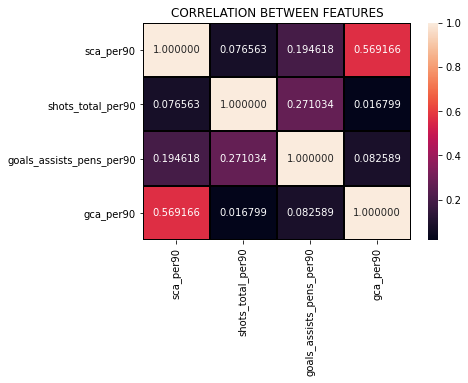

In [29]:
correlation = players[['sca_per90','shots_total_per90','goals_assists_pens_per90','gca_per90']].corr()
sns.heatmap(correlation,annot=True,fmt="f",linecolor="k",linewidths=1)
plt.title("CORRELATION BETWEEN FEATURES")
plt.show()

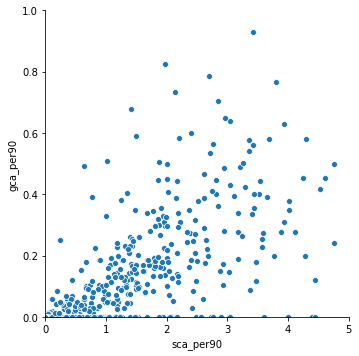

In [30]:
bx = sns.relplot(data=players, x="sca_per90", y="gca_per90")
xlim = bx.set(xlim=(0,5))
ylim = bx.set(ylim=(0,1))

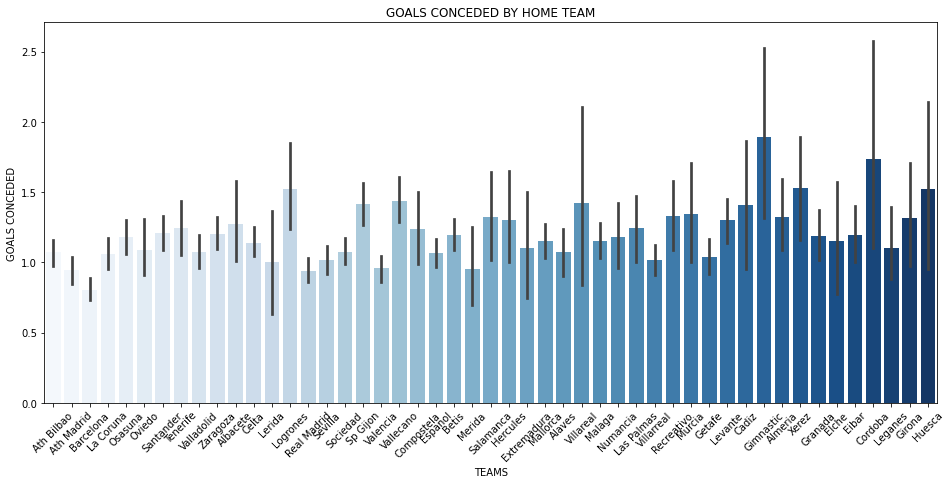

In [31]:
plt.figure(figsize=(16,7))
sns.barplot(x = matches["HomeTeam"],
            y = matches["FTAG"],
            palette = "Blues").set(xlabel='TEAMS', ylabel='GOALS CONCEDED')
plt.xticks(rotation=45)
plt.title("GOALS CONCEDED BY HOME TEAM")
# Show the plot
plt.show()

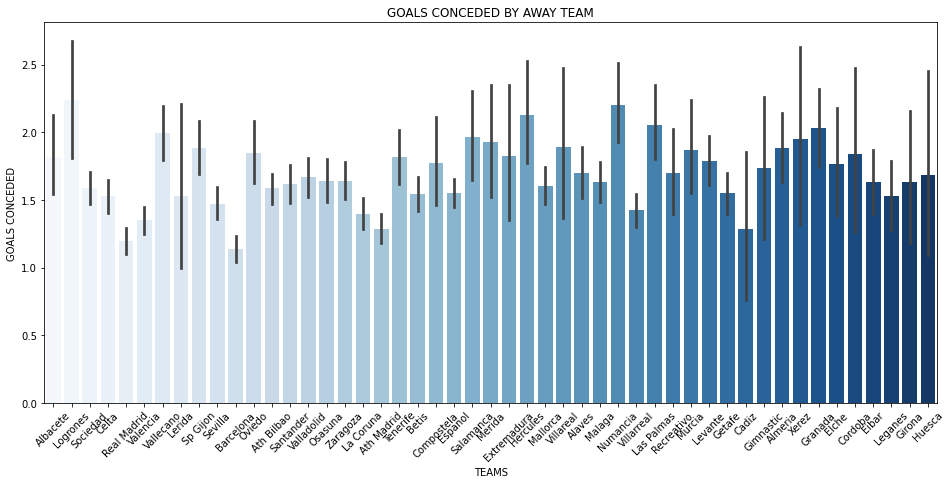

In [32]:
plt.figure(figsize=(16,7))
sns.barplot(x = matches["AwayTeam"],
            y = matches["FTHG"],
            palette = "Blues").set(xlabel='TEAMS', ylabel='GOALS CONCEDED')
plt.title("GOALS CONCEDED BY AWAY TEAM")
plt.xticks(rotation=45)
# Show the plot
plt.show()

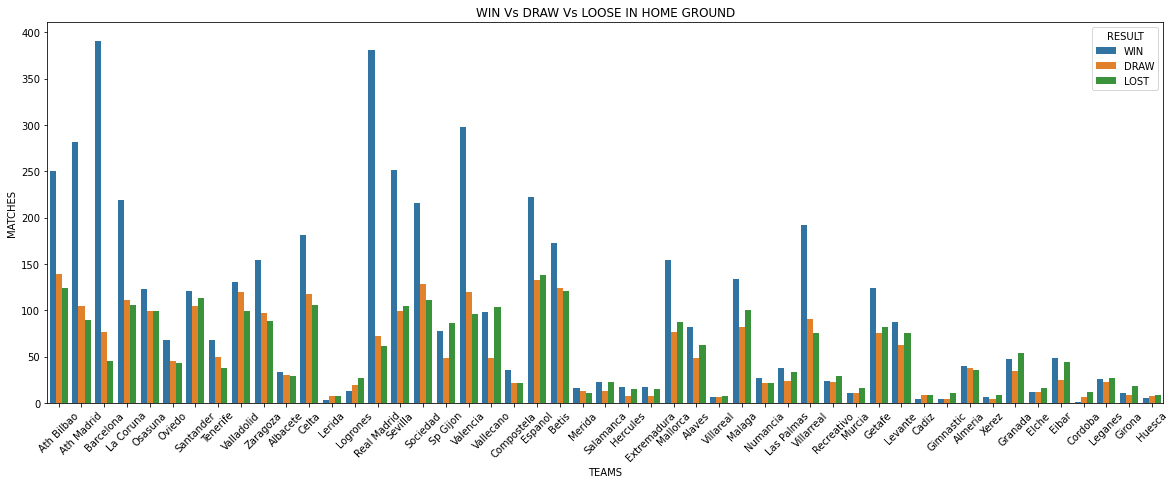

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(x = matches["HomeTeam"],
            hue = matches['FTR']).set(xlabel='TEAMS', ylabel='MATCHES')
plt.title("WIN Vs DRAW Vs LOOSE IN HOME GROUND")
plt.legend(title='RESULT', labels=['WIN', 'DRAW', 'LOST'])
plt.xticks(rotation=45)
# Show the plot
plt.show()

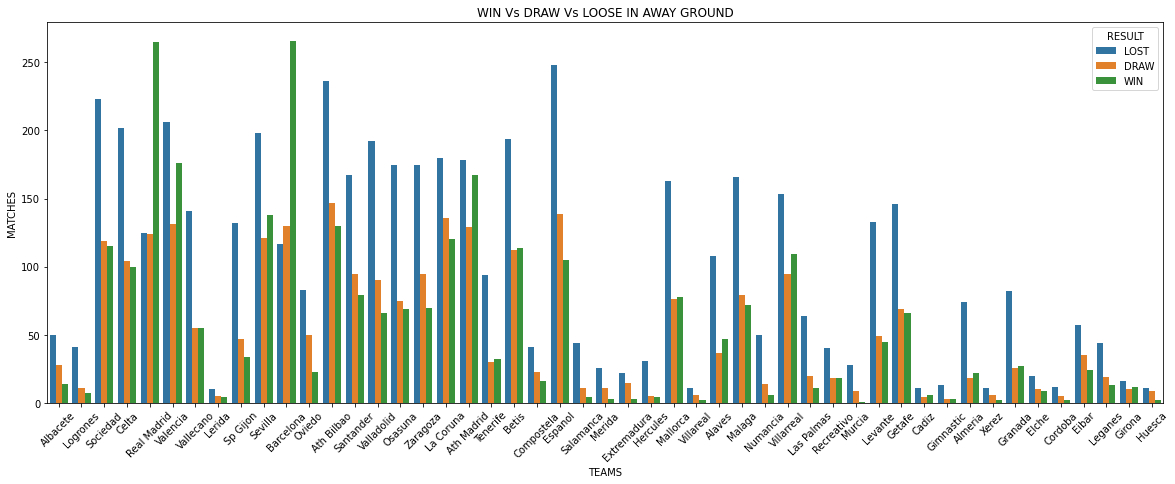

In [34]:
plt.figure(figsize=(20,7))
sns.countplot(x = matches["AwayTeam"],
            hue = matches['FTR']).set(xlabel='TEAMS', ylabel='MATCHES')
plt.title("WIN Vs DRAW Vs LOOSE IN AWAY GROUND")
plt.legend(title='RESULT', labels=['LOST', 'DRAW', 'WIN'])
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [35]:
matches.describe()

,Unnamed: 0,FTHG,FTAG,Season,HTHG,HTAG,GBH,GBD,GBA,IWH,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,11051.000000,10355.000000,10355.000000,11051.000000,9593.000000,9593.000000,4729.000000,4729.000000,4729.000000,7509.000000,...,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,208.964890,1.568904,1.109512,2005.249842,0.693214,0.483061,2.355394,3.598336,4.379975,2.438172,...,1.863664,-0.316194,1.955792,1.958629,1.959669,1.962530,2.018463,2.018936,1.937470,1.940449
std,129.742154,1.318418,1.117745,8.097132,0.843592,0.696223,1.424818,0.942945,3.087454,1.665292,...,0.455824,0.740895,0.102628,0.104099,0.103082,0.103994,0.104796,0.109858,0.097723,0.097881
min,0.000000,0.000000,0.000000,1993.000000,0.000000,0.000000,1.050000,2.350000,1.120000,1.030000,...,1.290000,-2.750000,1.680000,1.670000,1.700000,1.750000,1.780000,1.800000,1.710000,1.750000
25%,100.000000,1.000000,0.000000,1998.000000,0.000000,0.000000,1.700000,3.200000,2.750000,1.650000,...,1.550000,-0.750000,1.880000,1.880000,1.880000,1.880000,1.940000,1.930000,1.860000,1.860000
50%,203.000000,1.000000,1.000000,2005.000000,0.000000,0.000000,2.050000,3.300000,3.500000,2.000000,...,1.740000,-0.250000,1.960000,1.970000,1.950000,1.970000,2.010000,2.020000,1.930000,1.940000
75%,306.000000,2.000000,2.000000,2012.000000,1.000000,1.000000,2.450000,3.500000,4.800000,2.500000,...,2.040000,0.000000,2.040000,2.040000,2.040000,2.045000,2.100000,2.105000,2.015000,2.020000
max,551.000000,10.000000,8.000000,2020.000000,6.000000,6.000000,17.000000,11.000000,34.000000,20.000000,...,4.130000,1.750000,2.160000,2.190000,2.200000,2.290000,2.260000,2.300000,2.150000,2.210000


In [ ]:
modeldata=pd.DataFrame()
for i , row in matches.iterrows():
    if(i > 1000):
        ht=row.HomeTeam
        at=row.AwayTeam
#         print(data)
        htdatalast20={'wins':0,'goaldiff':0}
        atdatalast20={'wins':0,'goaldiff':0}
        htfound=0
        atfound=0
        versusdatalast5={'wins':0,'goaldiff':0}
        versusfound=0
        kk=i
        for j in range(kk,0,-1):
            cht=matches.loc[j,'HomeTeam']
            cat=matches.loc[j,'AwayTeam']
            if(htfound<20):
                if(cht==ht):
                    htfound+=1
                    htdatalast20['goaldiff']+=matches.loc[i,'FTHG'] - matches.loc[i,'FTAG']
                    if(matches.at[j,'FTR']=='D'):
                        htdatalast20['wins']+=0.5
                    elif(matches.at[j,'FTR']=='H'):
                        htdatalast20['wins']+=1
                    else:
                            None
                if(cat==ht):
                    htfound+=1
                    htdatalast20['goaldiff']-=(matches.loc[j,'FTHG'] - matches.loc[j,'FTAG'])
                    if(matches.at[j,'FTR']=='D'):
                        htdatalast20['wins']+=0.5
                    elif(matches.at[j,'FTR']=='H'):
                        htdatalast20['wins']-=1
                    else:
                            None
            if(atfound<20):
                if(cht==at):
                    atfound+=1
                    atdatalast20['goaldiff']+=(matches.loc[j,'FTHG'] - matches.loc[j,'FTAG'])
                    if(matches.at[j,'FTR']=='D'):
                        atdatalast20['wins']+=0.5
                    elif(matches.at[j,'FTR']=='H'):
                        atdatalast20['wins']+=1
                    else:
                            None
                if(cat==at):
                    atfound+=1
                    atdatalast20['goaldiff']-=(matches.loc[i,'FTHG'] - matches.loc[i,'FTAG'])
                    if(matches.at[j,'FTR']=='D'):
                        atdatalast20['wins']+=0.5
                    elif(matches.at[j,'FTR']=='H'):
                        atdatalast20['wins']-=1
                    else:
                            None
            if(versusfound<5):
                if((cht==ht and cat==at) or(cht==at and cat==ht)):
                    versusfound+=1
                    if(cht==ht):
                        versusdatalast5['goaldiff']+=matches.loc[j,'FTHG'] - matches.loc[j,'FTAG']
                        if(matches.at[j,'FTR']=='D'):
                            versusdatalast5['wins']+=0.5
                        elif(matches.at[j,'FTR']=='H'):
                            versusdatalast5['wins']+=1
                        else:
                            None
                    else:
                        versusdatalast5['goaldiff']-=(matches.loc[j,'FTHG'] - matches.loc[j,'FTAG'])
                        if(matches.at[j,'FTR']=='D'):
                            versusdatalast5['wins']+=0
                        elif(matches.at[j,'FTR']=='H'):
                            versusdatalast5['wins']-=1
                        else:
                            None
            if(versusfound==5 and htfound==20 and atfound==20):
                break
        
        if(versusfound==5 and htfound==20 and atfound==20):
            dictt={'ht':ht,'at':at,'htwinslast20':htdatalast20['wins'],'atwinslast20':atdatalast20['wins'],\
                  'htgdlast20':htdatalast20['goaldiff'],'atgdlast20':atdatalast20['goaldiff'],\
                  'versuslast5':versusdatalast5['wins'],'result':matches.at[i,'FTR'],\
                  }
#             print(dictt)
            modeldata=modeldata.append(dictt,ignore_index=True)
        if(i%1000==0):
            print(i)
modeldata.to_csv('modeldata.csv' , index=False)

In [ ]:
modeldata.describe()

# Models

In [36]:
df = pd.read_csv("modeldata.csv")

In [38]:
req_features = ['atgdlast20','atwinslast20','htgdlast20','htwinslast20','versuslast5']

In [39]:
X = df[req_features]
Y = df['result']

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [42]:
## Train classifier
def train_classifier(cls, X_train, y_train):
    cls.fit(X_train, y_train)
    
def predict_labels(cls, features, target):
    # Makes predictions using a fit classifier based on F1 score.
    y_pred = cls.predict(features)
    return cls.score(features, target) ,y_pred

def train_predict(cls, X_train, y_train, X_test, y_test):
    print("Training a {} using a training set size of {} ".format(cls.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(cls, X_train, y_train)

    # Print the results of prediction for both training and testing
    acc , predictions = predict_labels(cls, X_train, y_train)
    print("for training set")
    print("accuracy :", acc)
    print('')
    
    acc , predictions= predict_labels(cls, X_test, y_test)
    print("for test set")
    print("accuracy :", acc)
    return predictions ,acc

## Plot confusion matrix
def plot_confusion(predictions ,y_test, score):
    cm = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 10);

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 

## Logistic Regression

Training a LogisticRegression using a training set size of 5592 
for training set
accuracy : 0.9223891273247496

for test set
accuracy : 0.928686327077748


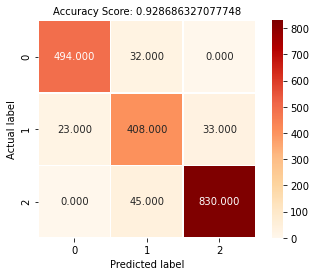

In [44]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred ,acc = train_predict(lr,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

## Decision Tree Classifier

Training a DecisionTreeClassifier using a training set size of 5592 
for training set
accuracy : 0.8277896995708155

for test set
accuracy : 0.8412868632707775


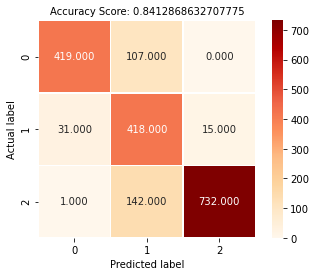

In [45]:
dtree_model = DecisionTreeClassifier(max_depth = 2)
pred ,acc= train_predict(dtree_model,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## K-Neighbors Classifier

Training a KNeighborsClassifier using a training set size of 5592 
for training set
accuracy : 0.9325822603719599

for test set
accuracy : 0.9136729222520107


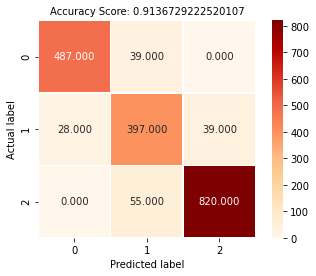

In [46]:
knn = KNeighborsClassifier(n_neighbors = 7)
pred ,acc= train_predict(knn,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)